# Canine Wellness Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d aaronisomaisom3/canine-wellness-dataset-synthetic-10k-samples

Dataset URL: https://www.kaggle.com/datasets/aaronisomaisom3/canine-wellness-dataset-synthetic-10k-samples
License(s): MIT
100%|█████████████████████████████████████████| 186k/186k [00:00<00:00, 205kB/s]
100%|█████████████████████████████████████████| 186k/186k [00:00<00:00, 205kB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Canine Wellness Prediction/canine-wellness-dataset-synthetic-10k-samples.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Canine Wellness Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("synthetic_dog_breed_health_data.csv")

In [42]:
df = df.head(6000)

In [43]:
df.shape

(6000, 21)

In [44]:
df.size

126000

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           6000 non-null   int64  
 1   Breed                        5837 non-null   object 
 2   Breed Size                   5844 non-null   object 
 3   Sex                          5808 non-null   object 
 4   Age                          5821 non-null   float64
 5   Weight (lbs)                 5831 non-null   float64
 6   Spay/Neuter Status           3874 non-null   object 
 7   Daily Activity Level         4665 non-null   object 
 8   Diet                         5814 non-null   object 
 9   Food Brand                   5836 non-null   object 
 10  Daily Walk Distance (miles)  5840 non-null   float64
 11  Other Pets in Household      5832 non-null   object 
 12  Medications                  5850 non-null   object 
 13  Seizures          

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6000.0,3000.500000,1732.195139,1.0,1500.75,3000.5,4500.25,6000.0
Age,5821.0,7.029892,3.766026,1.0,4.00,7.0,10.00,13.0
Weight (lbs),5831.0,50.465786,14.840680,10.0,40.00,51.0,61.00,106.0
Daily Walk Distance (miles),5840.0,2.526370,1.460559,0.0,1.00,3.0,3.00,8.0
Hours of Sleep,5834.0,11.004457,1.454604,8.0,10.00,11.0,12.00,14.0
Play Time (hrs),5810.0,1.520998,0.978328,0.0,1.00,1.0,2.00,4.0
Annual Vet Visits,5810.0,1.476248,1.158116,0.0,1.00,1.0,2.00,4.0
Average Temperature (F),5782.0,64.667935,14.922439,30.0,54.00,64.0,75.00,100.0


In [47]:
df.isnull().sum()

ID                                0
Breed                           163
Breed Size                      156
Sex                             192
Age                             179
Weight (lbs)                    169
Spay/Neuter Status             2126
Daily Activity Level           1335
Diet                            186
Food Brand                      164
Daily Walk Distance (miles)     160
Other Pets in Household         168
Medications                     150
Seizures                        172
Hours of Sleep                  166
Play Time (hrs)                 190
Owner Activity Level           1343
Annual Vet Visits               190
Average Temperature (F)         218
Synthetic                       192
Healthy                         186
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.nunique()

ID                             6000
Breed                            15
Breed Size                        3
Sex                               2
Age                              13
Weight (lbs)                     92
Spay/Neuter Status                2
Daily Activity Level              4
Diet                              4
Food Brand                        9
Daily Walk Distance (miles)       9
Other Pets in Household           2
Medications                       2
Seizures                          2
Hours of Sleep                    7
Play Time (hrs)                   5
Owner Activity Level              4
Annual Vet Visits                 5
Average Temperature (F)          71
Synthetic                         1
Healthy                           2
dtype: int64

In [50]:
df['Healthy'].value_counts()

Healthy
Yes    4340
No     1474
Name: count, dtype: int64

## Data Visualization

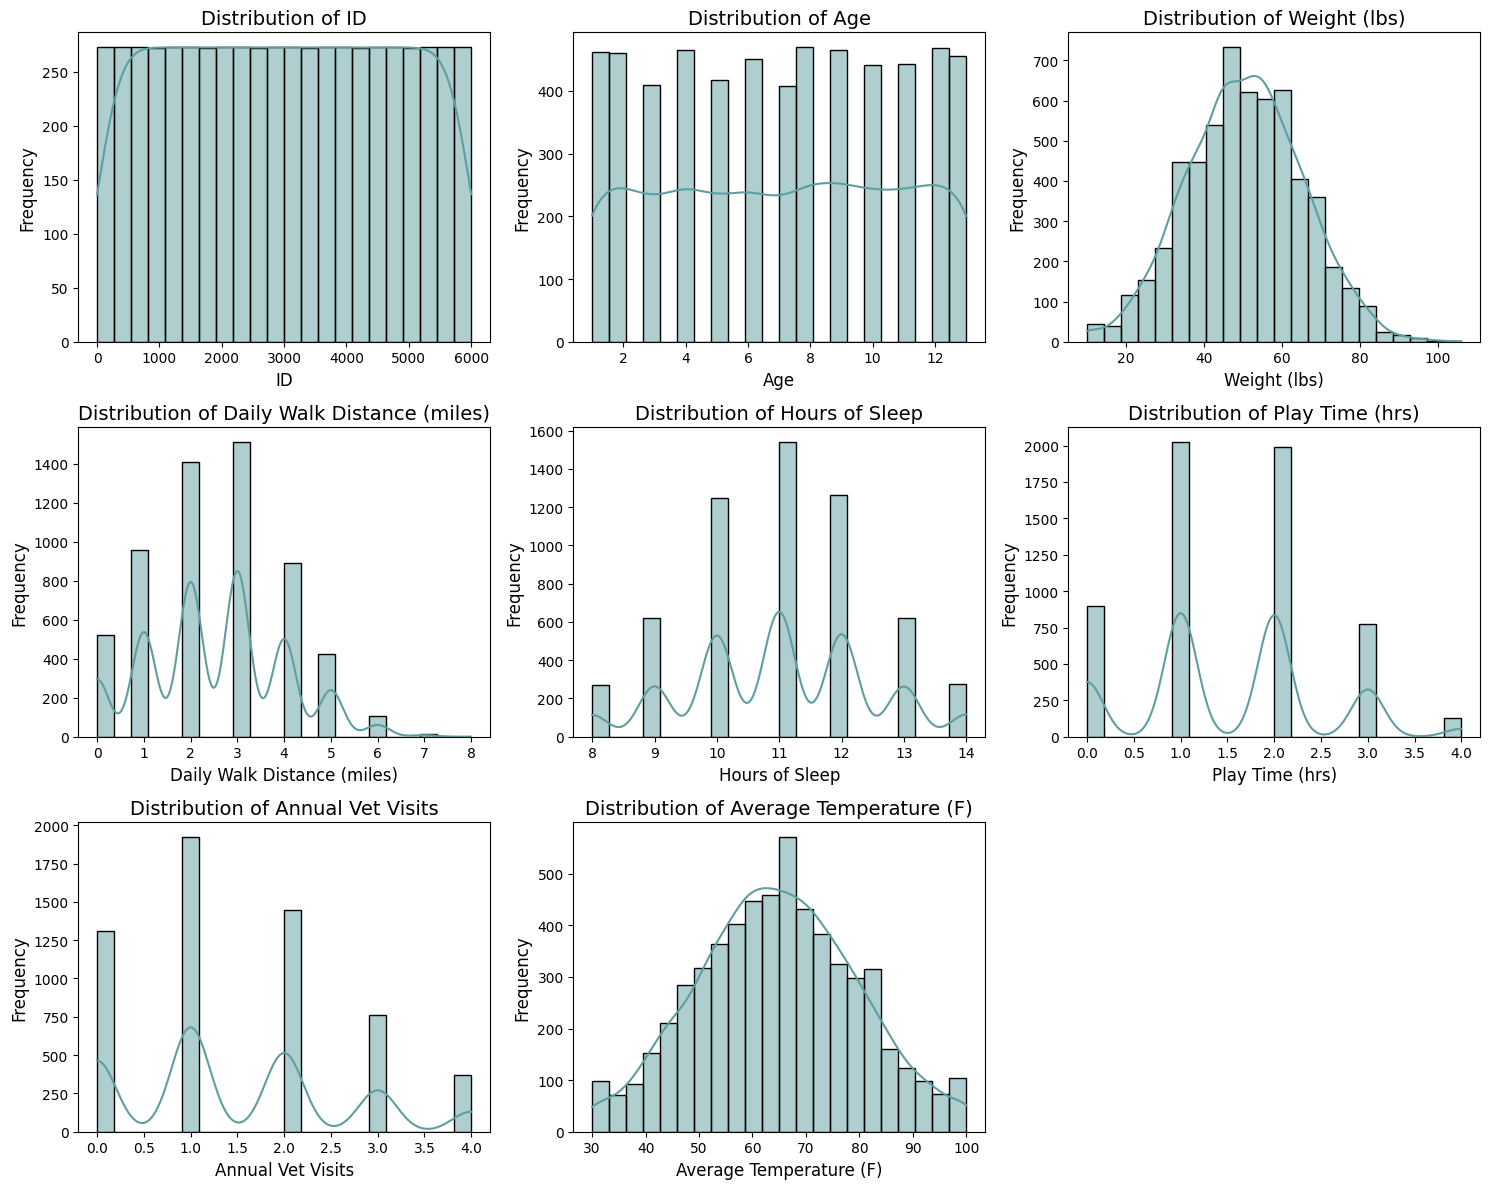

In [51]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

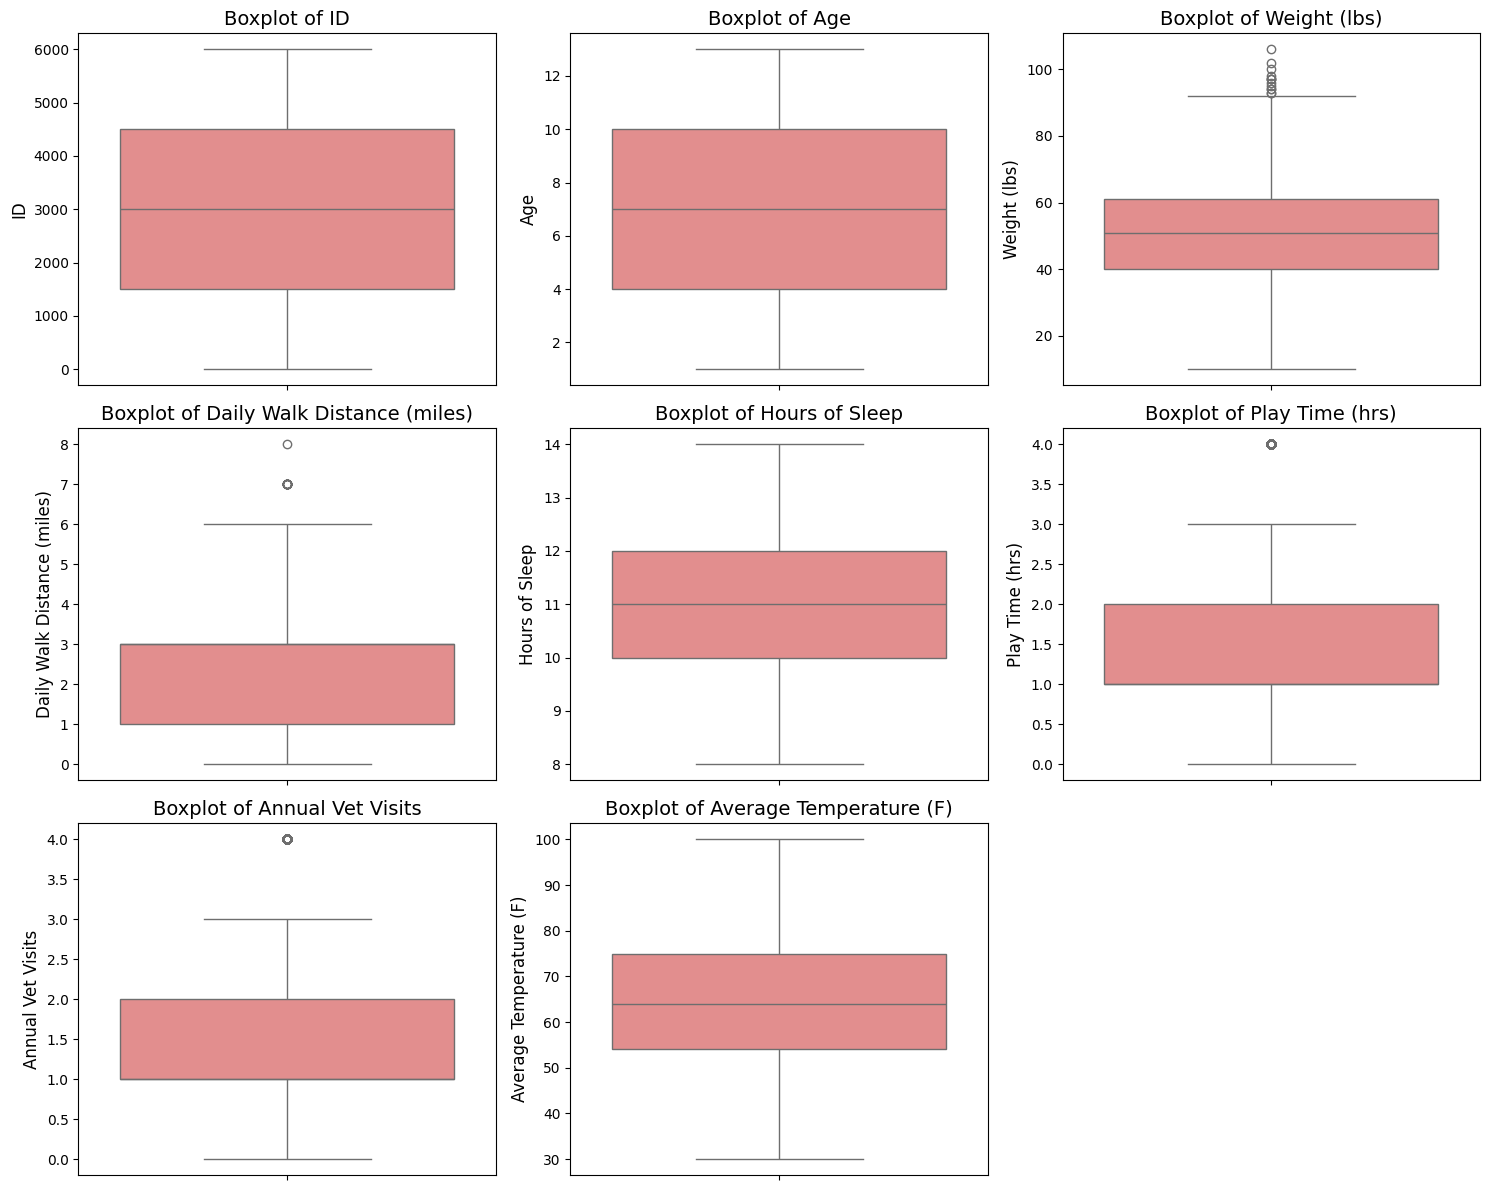

In [52]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

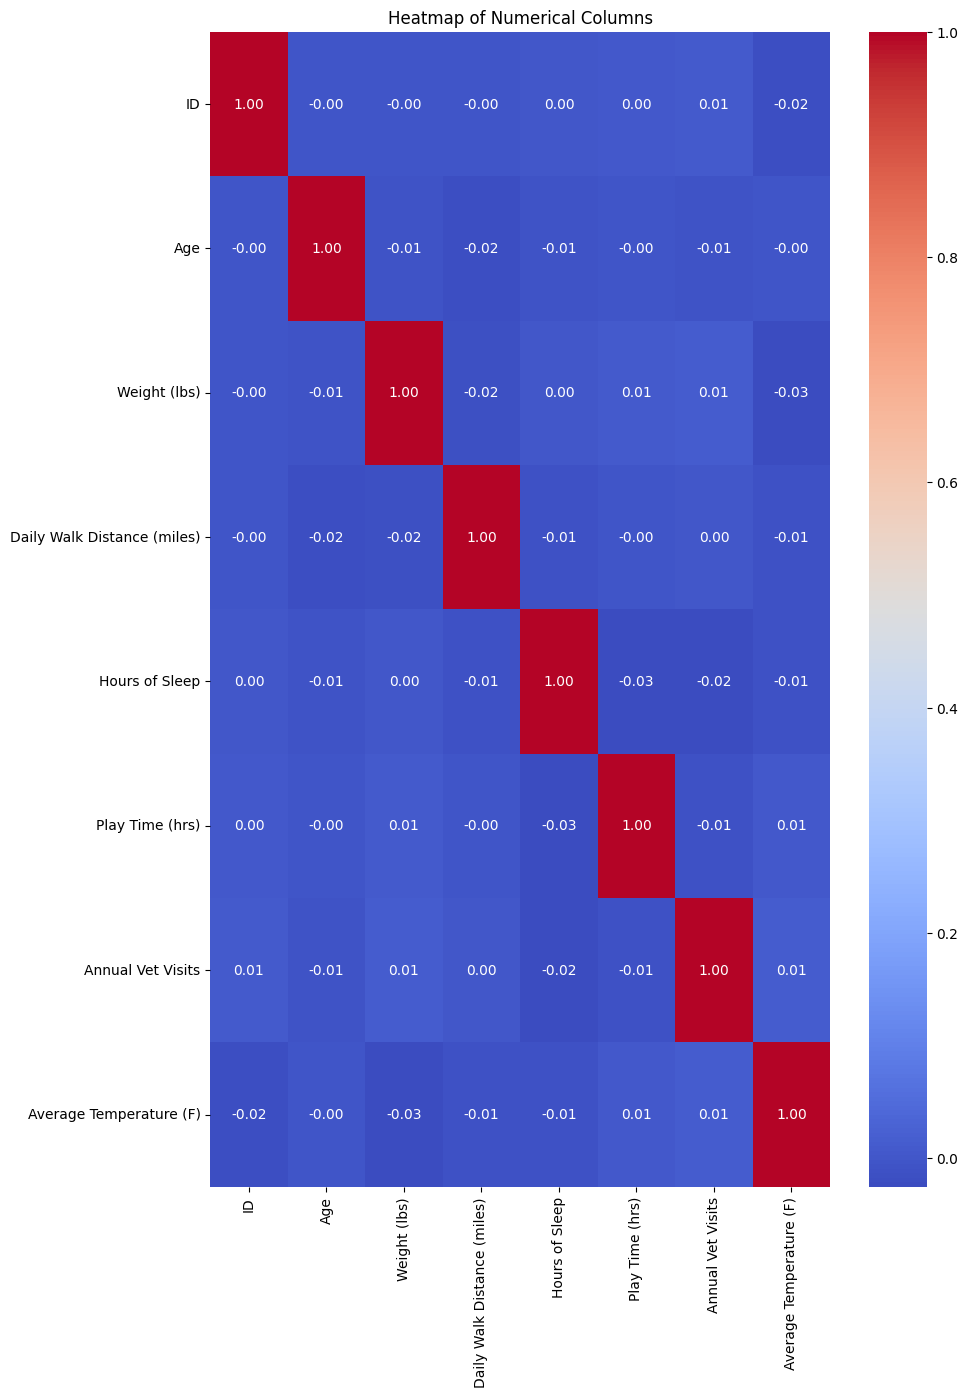

In [53]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,15))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [54]:
# Droppin column with null values

df.drop(columns=['Spay/Neuter Status'], inplace=True)

In [55]:
# Filling numerical null values with mean and categorical null values with mode

for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [56]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [57]:
X = df.drop(columns=['Healthy'])
y = df['Healthy']

In [58]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Evaluation

In [60]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [62]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.6741666666666667, 0.6925, 0.8266666666666667, 0.8091666666666667, 0.7908333333333334, 0.8283333333333334, 0.7775, 0.7383333333333333, 0.5366666666666666]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.59      0.45       273
           1       0.85      0.70      0.77       927

    accuracy                           0.67      1200
   macro avg       0.61      0.64      0.61      1200
weighted avg       0.74      0.67      0.70      1200

Confusion Matrix:
 [[161 112]
 [279 648]]


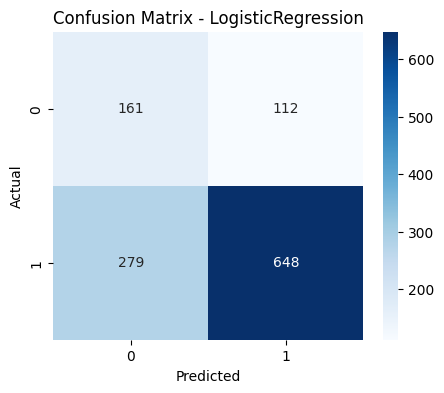

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.64      0.49       273
           1       0.87      0.71      0.78       927

    accuracy                           0.69      1200
   macro avg       0.63      0.67      0.63      1200
weighted avg       0.76      0.69      0.71      1200

Confusion Matrix:
 [[175  98]
 [271 656]]


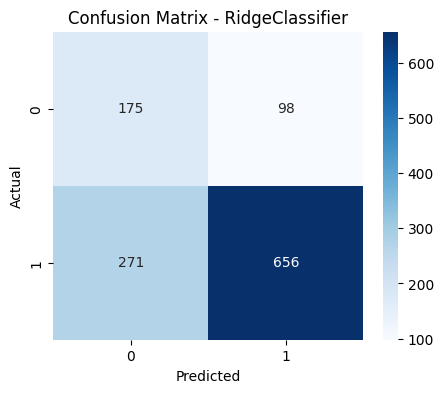

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.63       273
           1       0.90      0.88      0.89       927

    accuracy                           0.83      1200
   macro avg       0.75      0.77      0.76      1200
weighted avg       0.83      0.83      0.83      1200

Confusion Matrix:
 [[180  93]
 [115 812]]


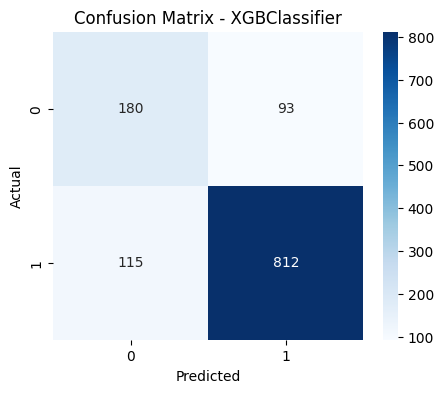

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60       273
           1       0.89      0.86      0.87       927

    accuracy                           0.81      1200
   macro avg       0.73      0.75      0.74      1200
weighted avg       0.82      0.81      0.81      1200

Confusion Matrix:
 [[173 100]
 [130 797]]


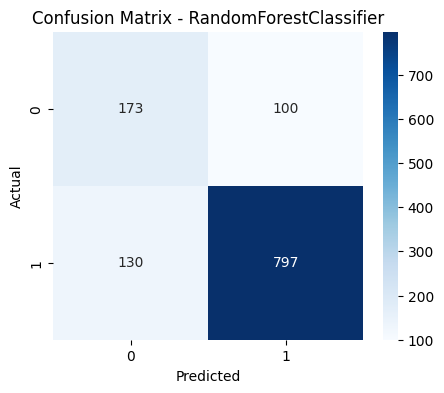

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.71      0.61       273
           1       0.91      0.81      0.86       927

    accuracy                           0.79      1200
   macro avg       0.72      0.76      0.73      1200
weighted avg       0.82      0.79      0.80      1200

Confusion Matrix:
 [[195  78]
 [173 754]]


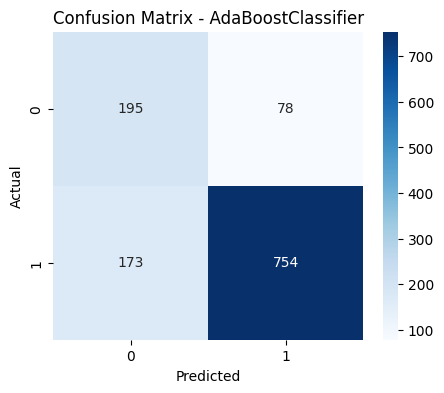

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.72      0.66       273
           1       0.91      0.86      0.89       927

    accuracy                           0.83      1200
   macro avg       0.76      0.79      0.77      1200
weighted avg       0.84      0.83      0.83      1200

Confusion Matrix:
 [[197  76]
 [130 797]]


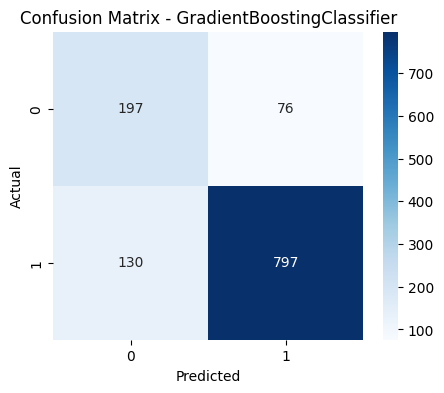

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.71      0.60       273
           1       0.91      0.80      0.85       927

    accuracy                           0.78      1200
   macro avg       0.71      0.76      0.73      1200
weighted avg       0.82      0.78      0.79      1200

Confusion Matrix:
 [[195  78]
 [182 745]]


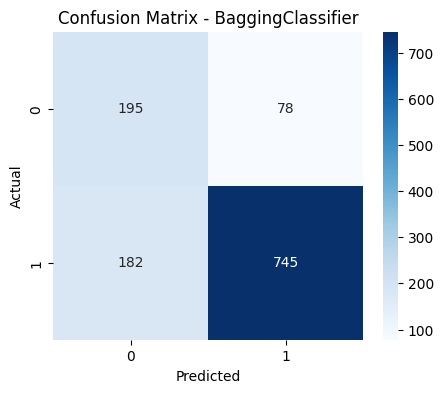

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.63      0.53       273
           1       0.88      0.77      0.82       927

    accuracy                           0.74      1200
   macro avg       0.67      0.70      0.68      1200
weighted avg       0.78      0.74      0.76      1200

Confusion Matrix:
 [[173 100]
 [209 718]]


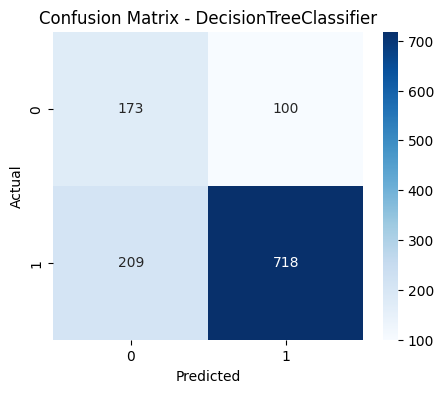

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.40      0.28       273
           1       0.77      0.58      0.66       927

    accuracy                           0.54      1200
   macro avg       0.49      0.49      0.47      1200
weighted avg       0.64      0.54      0.57      1200

Confusion Matrix:
 [[109 164]
 [392 535]]


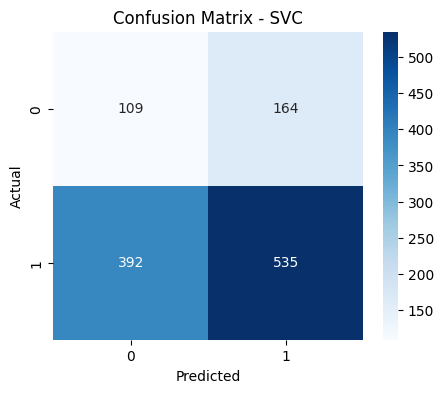

In [63]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()